In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('FinalDatasetCsv.csv')

In [ ]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
      Acc X     Acc Y     Acc Z    gyro_x    gyro_y    gyro_z  label
0  0.046402 -0.137178 -0.282934 -0.036306 -0.008226 -0.023416      0
1 -0.136978  0.365242  0.108889  0.035776 -0.009448  0.009570      0
2 -0.045355 -0.103340 -0.534985 -0.011871 -0.027774  0.003462      0
3  0.242089  0.072761 -0.350396 -0.017980  0.002769 -0.005091      0
4 -0.230234  0.011765 -0.494085  0.011342  0.003380  0.006516      0


In [ ]:
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(14249, 7)


In [ ]:
print("\nColumn names and types:")
print(data.dtypes)


Column names and types:
Acc X     float64
Acc Y     float64
Acc Z     float64
gyro_x    float64
gyro_y    float64
gyro_z    float64
label       int64
dtype: object


In [ ]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Acc X     0
Acc Y     0
Acc Z     0
gyro_x    0
gyro_y    0
gyro_z    0
label     0
dtype: int64


In [ ]:
# Handle missing values (example: filling with mean or dropping)
data = data.fillna(data.mean())

In [ ]:
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())


Number of duplicate rows:
9


In [ ]:
# Drop duplicates if any
data = data.drop_duplicates()

In [ ]:
print("\nSummary statistics for each column:")
print(data.describe())


Summary statistics for each column:
              Acc X         Acc Y         Acc Z        gyro_x        gyro_y  \
count  14240.000000  14240.000000  14240.000000  14240.000000  14240.000000   
mean      -0.001110      0.180187     -0.023760     -0.001333     -0.006517   
std        1.031191      0.837417      1.769122      0.141065      0.087861   
min       -8.805807     -8.476646    -17.320633     -2.062668     -0.571912   
25%       -0.379072     -0.126746     -0.701686     -0.046690     -0.033272   
50%       -0.013090      0.167116     -0.026197     -0.002219     -0.005783   
75%        0.363018      0.479060      0.675028      0.044939      0.021706   
max       10.488632     11.013258     19.725800      1.611687      0.599585   

             gyro_z         label  
count  14240.000000  14240.000000  
mean      -0.003203      0.592697  
std        0.068030      0.491349  
min       -0.666047      0.000000  
25%       -0.027224      0.000000  
50%       -0.002179      1.000000  

In [ ]:
# Step 5: Data Visualization
# Distribution of each sensor reading
sensor_columns = data.columns.drop(['Acc X', 'Acc Y'])

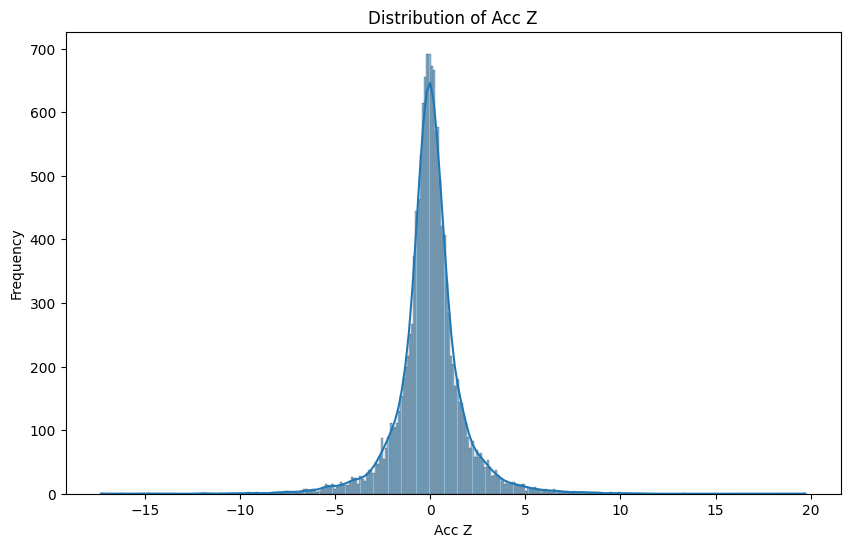

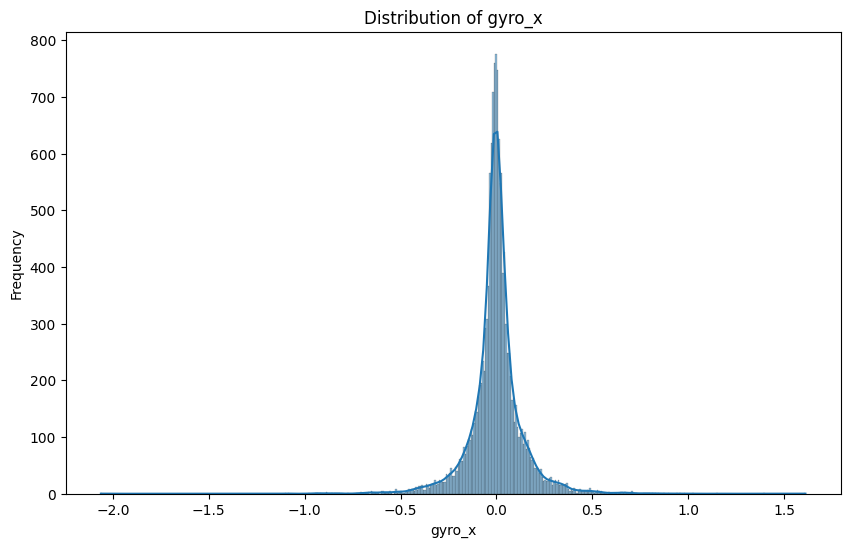

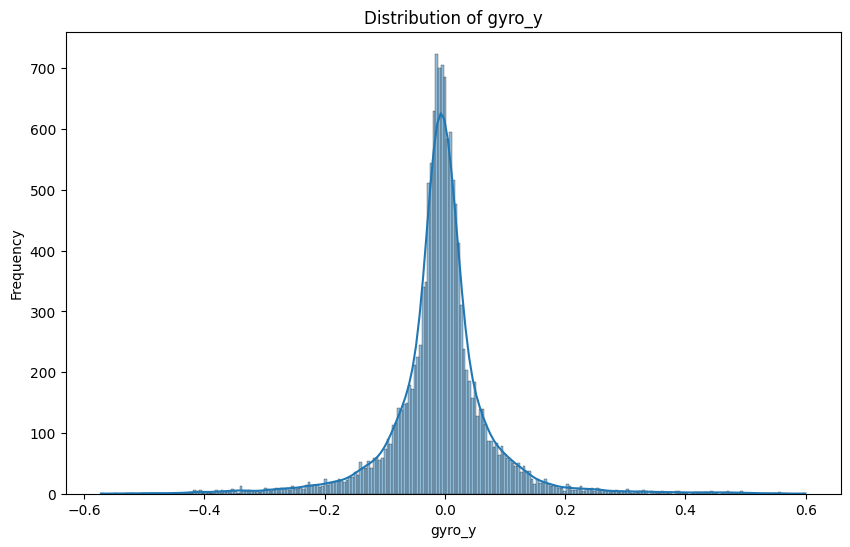

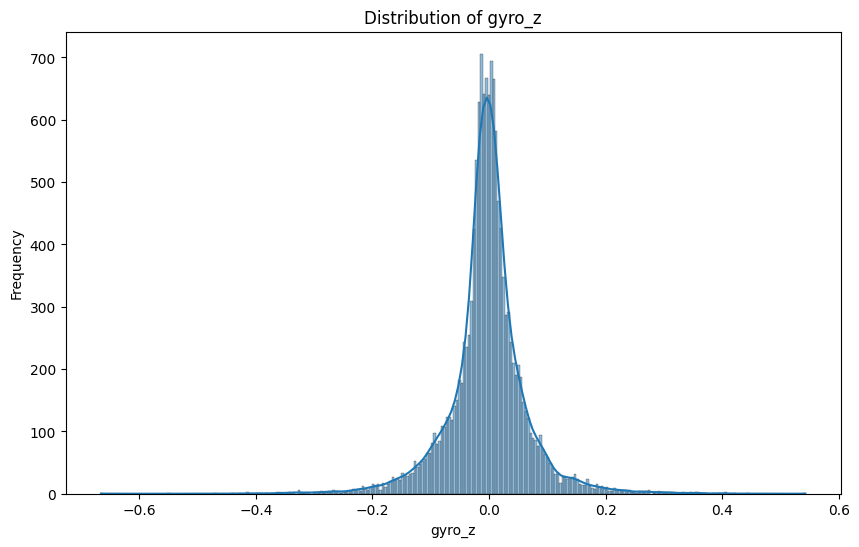

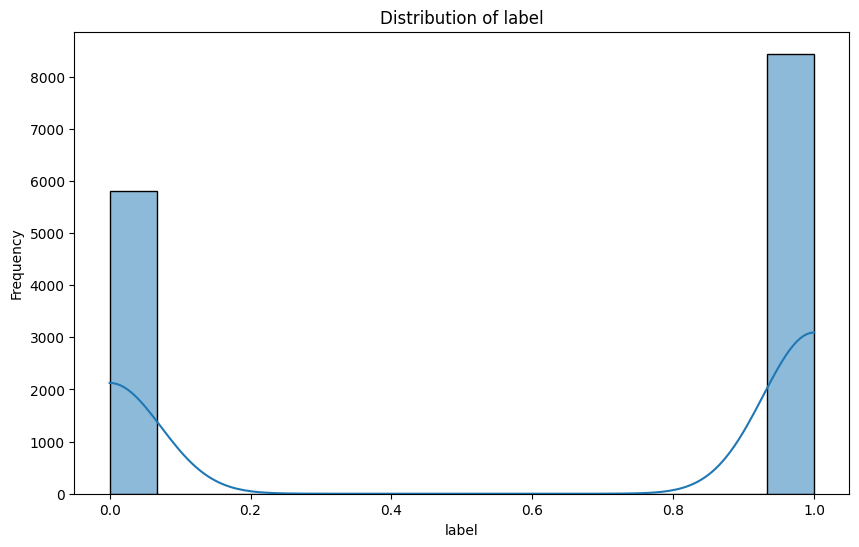

In [ ]:
for col in sensor_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

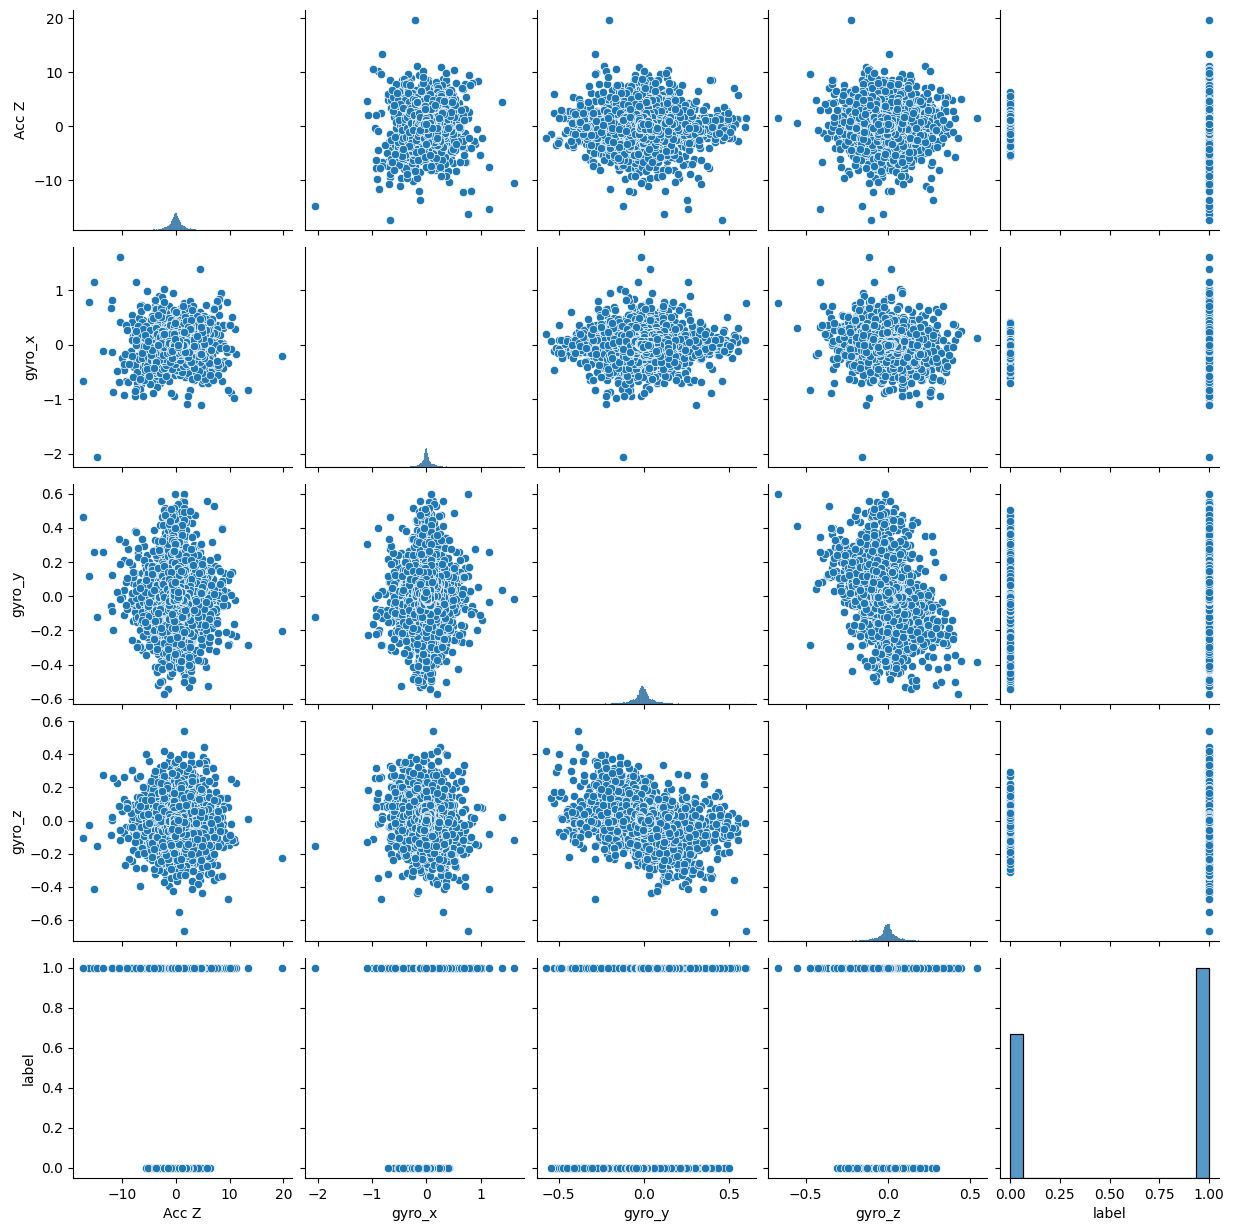

In [ ]:

# Pairplot to visualize relationships
sns.pairplot(data[sensor_columns])
plt.show()


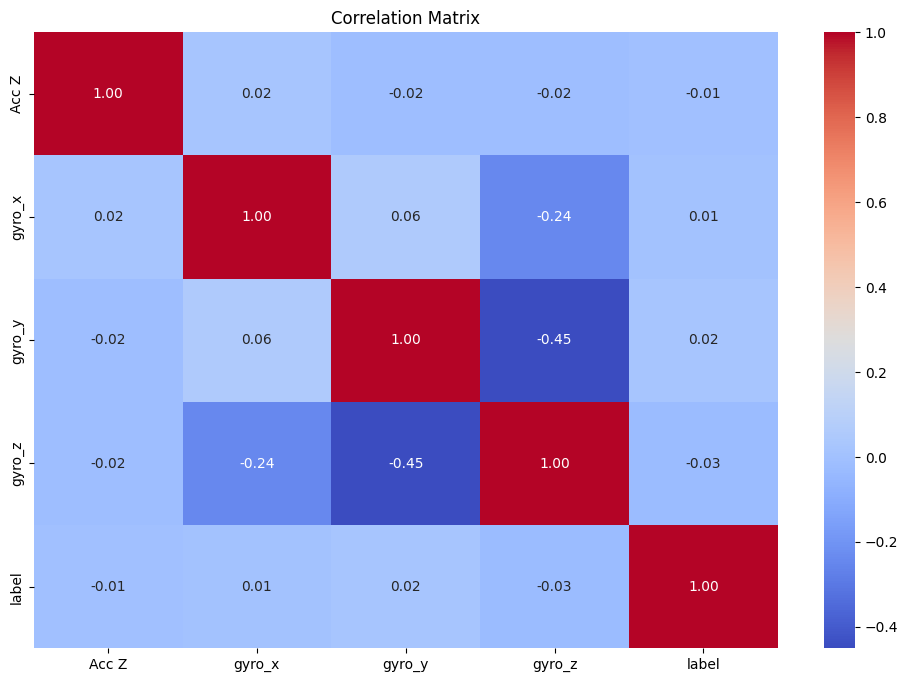

In [ ]:
# Step 6: Correlation Analysis
correlation_matrix = data[sensor_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Step 7: Time Series Analysis (if data has a timestamp column)
if 'timestamp' in data.columns:
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data.set_index('timestamp', inplace=True)

    for col in sensor_columns:
        plt.figure(figsize=(12, 6))
        data[col].plot()
        plt.title(f'Time Series of {col}')
        plt.xlabel('Time')
        plt.ylabel(col)
        plt.show()

In [ ]:
# Saving the cleaned data to a new CSV file
data.to_csv('cleaned_sensor_data.csv', index=False)

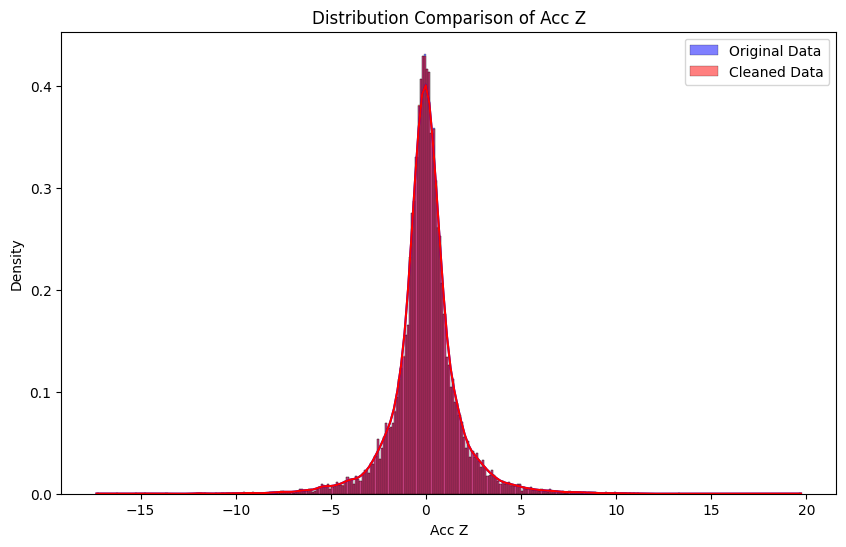

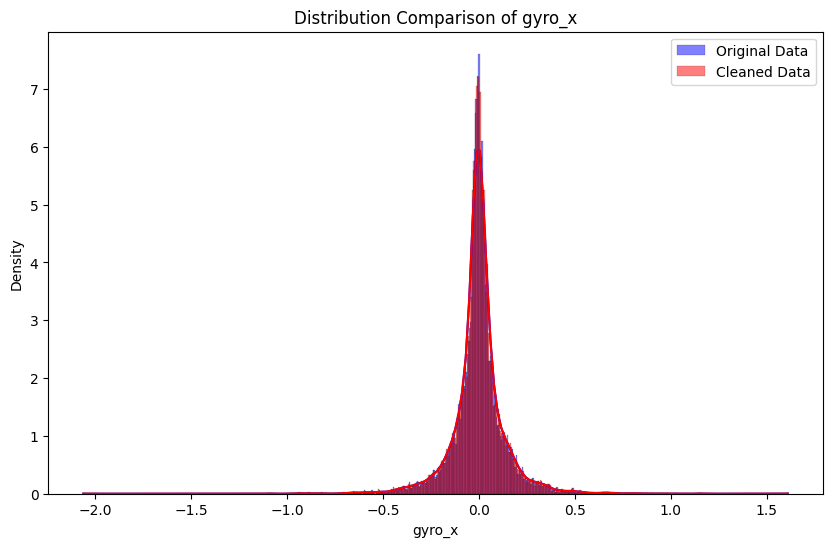

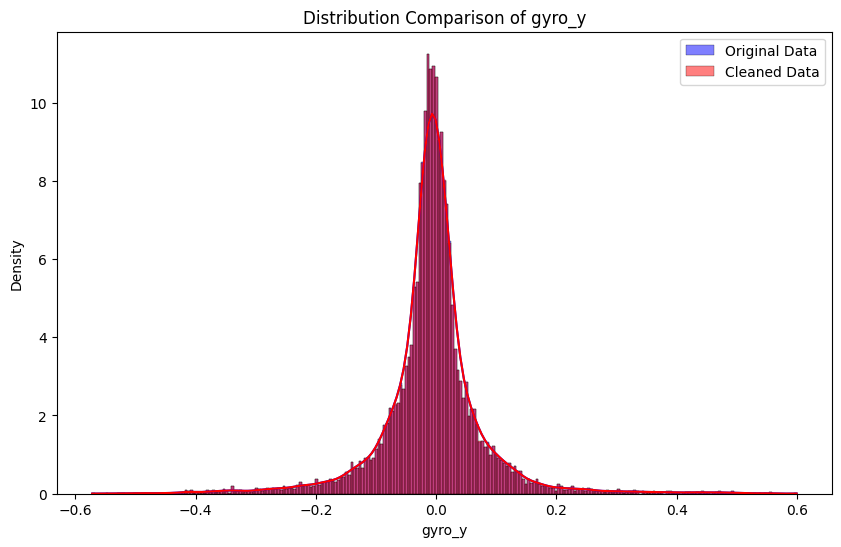

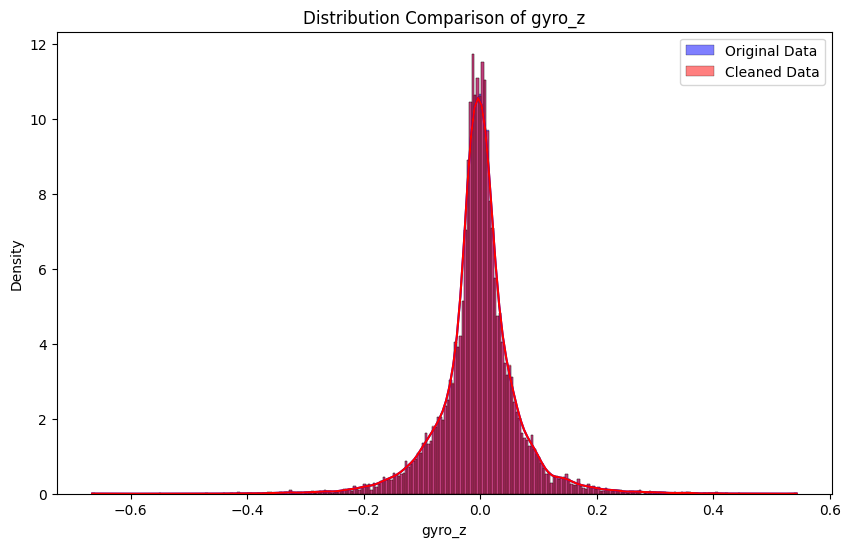

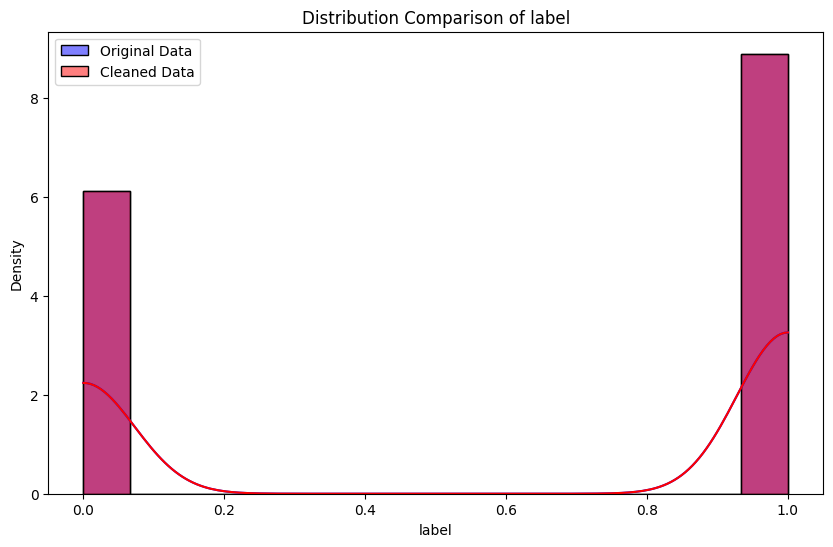

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load original (uncleaned) and cleaned data
original_data = pd.read_csv('FinalDatasetCsv.csv')
cleaned_data = pd.read_csv('cleaned_sensor_data.csv')

# Ensure the same columns are present in both datasets
sensor_columns = original_data.columns.drop(['Acc X', 'Acc Y'])  # Adjust columns as needed

# Plot the distribution comparison for each sensor column
for col in sensor_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(original_data[col], kde=True, color='blue', label='Original Data', stat="density", alpha=0.5)
    sns.histplot(cleaned_data[col], kde=True, color='red', label='Cleaned Data', stat="density", alpha=0.5)
    plt.title(f'Distribution Comparison of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load original (uncleaned) and cleaned data
original_data = pd.read_csv('FinalDatasetCsv.csv')
cleaned_data = pd.read_csv('cleaned_sensor_data.csv')

# Ensure the same columns are present in both datasets
sensor_columns = original_data.columns.drop(['Acc X', 'Acc Y'])  # Adjust columns as needed

# Plot the distribution comparison for each sensor column
for col in sensor_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(original_data[col], kde=True, color='blue', label='Original Data', stat="density", alpha=0.5)
    sns.histplot(cleaned_data[col], kde=True, color='red', label='Cleaned Data', stat="density", alpha=0.5)
    plt.title(f'Distribution Comparison of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

  timestamp       X        Y   Speed  Heading  AgentCount  Density     Acc  \
0   0:05:36  0.4225  19.1176  1.1432  89.1222          81     0.81 -0.0027   
1   0:05:37  0.3704  19.5130  1.1476  89.5976          83     0.83 -0.0027   
2   0:05:38  0.3999  19.8316  1.1466  89.4905          86     0.86 -0.0051   
3   0:05:39  0.3787  20.0386  1.1521  89.2123          88     0.88 -0.0009   
4   0:05:40  0.4031  20.4625  1.1499  89.2521          88     0.88 -0.0012   

   LevelOfCrowdness  label  label2  Severity_level  
0                 1      0  normal               0  
1                 1      0  normal               0  
2                 1      0  normal               0  
3                 1      0  normal               0  
4                 1      0  normal               0  
Accuracy: 0.6932
              precision    recall  f1-score   support

           0       0.71      0.95      0.82     17152
           1       0.32      0.06      0.09      6971

    accuracy                    

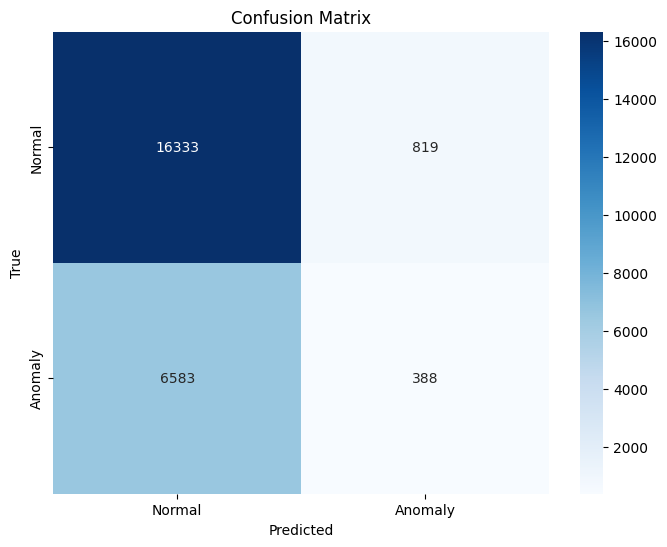

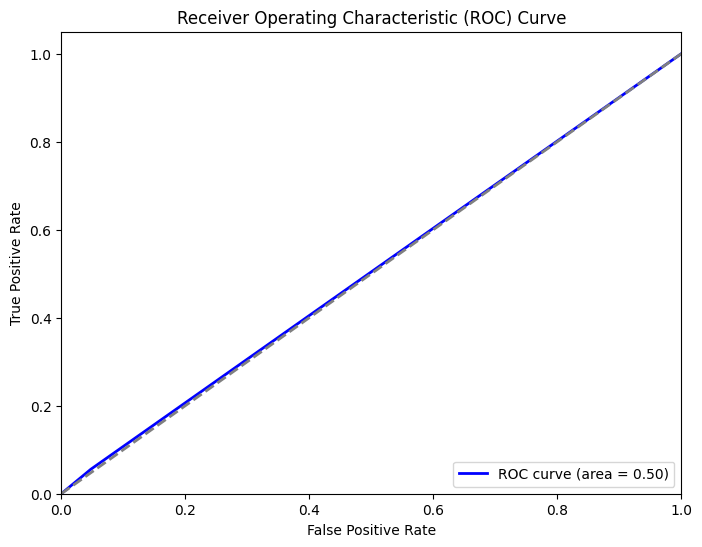

Scaler saved successfully.
Scaler loaded successfully.


In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load and Preprocess the Dataset
# Assume 'Crowd data for anomaly detection.csv' is your dataset file
data = pd.read_csv('Crowd data for anomaly detection.csv')

# Display the first few rows
print(data.head())

# Drop the 'timestamp' and 'label2' columns as they are not suitable for numerical analysis
data = data.drop(columns=['timestamp', 'label2'])

# Handle Missing Values
data.fillna(data.mean(), inplace=True)

# Normalize the Data (excluding the 'label' and 'Severity_level' columns)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['label', 'Severity_level']))

# Step 3: Train the LOF Model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
# Fit the model (LOF is unsupervised and doesn't have a separate fit method)
predictions = lof.fit_predict(data_scaled)

# Step 4: Make Predictions and Evaluate the Model
# Convert predictions to binary (1 for anomaly, 0 for normal)
anomalies = np.where(predictions == -1, 1, 0)

# Add anomaly labels to the original data
data['anomaly'] = anomalies

# Evaluate the model
# Assuming 'label' column has the true labels (0 for normal, 1 for anomaly)
true_labels = data['label']
accuracy = accuracy_score(true_labels, anomalies)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(true_labels, anomalies))

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, anomalies)

# ROC Curve
fpr, tpr, thresholds = roc_curve(true_labels, anomalies)
roc_auc = roc_auc_score(true_labels, anomalies)

# Step 5: Plot the Results
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Step 6: Save the Scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

print('Scaler saved successfully.')

# Step 7: Load the Scaler (for future use)
loaded_scaler = joblib.load('scaler.pkl')

print('Scaler loaded successfully.')
